In [31]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage.filters

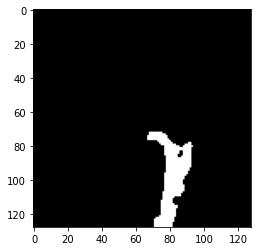

In [48]:
image = cv2.imread('/content/1.PNG')
image = cv2.resize(image,(128,128))

def threshold(image):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  blurred = cv2.GaussianBlur(gray, (9, 9), 0)
  blurred1 = skimage.filters.laplace(blurred, ksize =3)
  thresh = cv2.threshold(blurred, 215, 255, cv2.THRESH_BINARY)[1]
  return thresh, gray

def gaussblur(sigma, Image):
  image2 = cv2.resize(Image, (0, 0), fx=2, fy=2)
  sigma1 = np.sqrt(max((sigma ** 2) - 1, 0.01))
  k = cv2.GaussianBlur(image2, (0, 0), sigmaX=sigma1, sigmaY=sigma1)
  return k

def gradient_image(image1): 
  #Output=[]
  Output = cv2.Laplacian(image1,cv2.CV_64F)
  #Output.append(cv2.Sobel(image1,cv2.CV_64F,1,0,ksize=3))
  #Output.append(cv2.Sobel(image1,cv2.CV_64F,0,1,ksize=3))
  return Output

def preproc(image):
  k = gaussblur(0.9, image)
  Output = gradient_image(k)
  thresh = threshold(Output)
  return thresh

thresh1,gray = threshold(image)
plt.imshow(thresh1,cmap='gray')

Tool wear is over safe limit


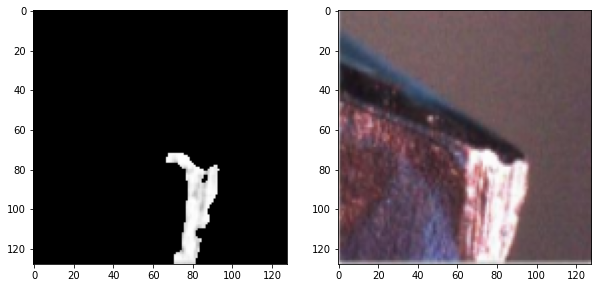

In [49]:
def mask(thresh1, gray):
  kk = np.zeros([128,128])
  a=0
  for ii in range (128):
    for jj in range (128):
      if thresh1[ii,jj]>0:
        kk[ii,jj]=1
        a= a+1
      else:
        kk[ii,jj]=0
  bb = kk*gray
  return bb,a

#def tool_wear_identifier(image):
  #thresh1, gray = threshold(image)
bb,a = mask(thresh1, gray)

#bb = tool_wear_identifier(image)
fig, plot = plt.subplots(1, 2, figsize=(10,8))
plot[0].imshow(bb,cmap='gray')
plot[1].imshow(image,cmap='gray')
if a>120:
  print('Tool wear is over safe limit')
else:
  print('Tool wear is minimal')
#plt.imshow(bb, cmap = 'gray')

Tool wear is minimal


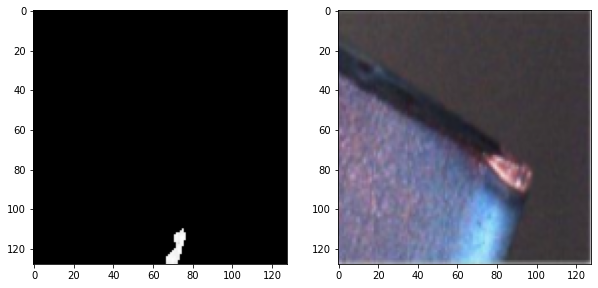

In [50]:
image1 = cv2.imread('/content/6.PNG')
image1 = cv2.resize(image1,(128,128))

thresh11,gray1 = threshold(image1)
bb1,a1 = mask(thresh11, gray1)

fig, plot = plt.subplots(1, 2, figsize=(10,8))
plot[0].imshow(bb1,cmap='gray')
plot[1].imshow(image1,cmap='gray')
if a1>120:
  print('Tool wear is over safe limit')
else:
  print('Tool wear is minimal')
#plt.imshow(bb1, cmap = 'gray')